In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train=pd.read_csv('Train_Data_ET.csv')

test=pd.read_csv('Test_Data_ET.csv')
data=pd.read_csv('data.csv').drop('Unnamed: 0',axis=1)
train.shape,test.shape

((97616, 32), (41836, 31))

In [118]:
data.shape

(139452, 31)

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
le=LabelEncoder()
ms=MinMaxScaler()
ss=StandardScaler()
from sklearn import metrics

In [120]:
for i in data[['Recently_upskilled', 'Region', 'RemoteWork',
       'PercentSalaryIncrement', 'OfficeHours', 'StockOptionLevel',
       'College_Tier', 'YearsSinceLastPromotion', 'HighestEducation',
       'BusinessTravel', 'JobLevel', 'MaritalStatus', 'TotalWorkExp','yof joining', 'YearsWithCurrManager',
       'DistanceFromHome', 'NumCompaniesWorked', 'Gender',
       'TrainingTimesLastYear', 'Department', 'EnvironmentSatisfaction1',
       'EnvironmentSatisfaction2', 'JobSatisfaction1', 'JobSatisfaction2',
       'JobInvolvement1', 'JobInvolvement2', 'PerformanceRating1',
       'PerformanceRating2']]:
    print('\n\n-----------------------',i,'--------------------------------')
    print(data[i].value_counts()/data.shape[0]*100)




----------------------- Recently_upskilled --------------------------------
0    79.716318
1    20.283682
Name: Recently_upskilled, dtype: float64


----------------------- Region --------------------------------
Hyderabad    26.210452
Delhi NCR    26.074205
Bangalore    24.974902
Chennai      22.740441
Name: Region, dtype: float64


----------------------- RemoteWork --------------------------------
0    98.408771
1     1.591229
Name: RemoteWork, dtype: float64


----------------------- PercentSalaryIncrement --------------------------------
13    13.855664
14    12.686086
12    11.951066
15    10.945702
16     8.623039
11     7.376015
17     6.911339
18     6.192095
19     5.172389
20     3.930385
21     3.114333
10     2.931475
22     2.681209
23     1.790580
24     0.991022
25     0.572957
26     0.241660
27     0.032986
Name: PercentSalaryIncrement, dtype: float64


----------------------- OfficeHours --------------------------------
7    47.249233
8    41.944182
9    10.806586


# ------------------------------------------------------------------------------------------

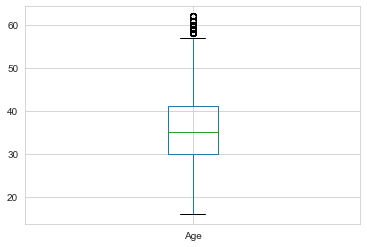

In [121]:
data['Age'].plot(kind='box')

In [122]:
data['Age'].skew(),np.log(data['Age']).skew(),np.cbrt(data['Age']).skew()

(0.4369710510382229, -0.16383965892830263, 0.04611620165686106)

In [124]:
agegrp=[]
for age in data['Age']:
    if age<=20:
        agegrp.append('G0')
    elif age>20 and age<=25:
        agegrp.append('G1')
    elif age>25 and age<=30:
        agegrp.append('G2')
    elif age>30 and age<=35:
        agegrp.append('G3')
    elif age>35 and age<=40:
        agegrp.append('G4')
    elif age>40 and age<=45:
        agegrp.append('G5')
    elif age>45 and age<=50:
        agegrp.append('G6')
    elif age>50 and age<=55:
        agegrp.append('G7')
    elif age>55 and age<=60:
        agegrp.append('G8')
    else:
        agegrp.append('G9')
data['Age_group']=agegrp

In [125]:
data['Age']=np.cbrt(data['Age'])

# ------------------------------------------------------------------------------------------

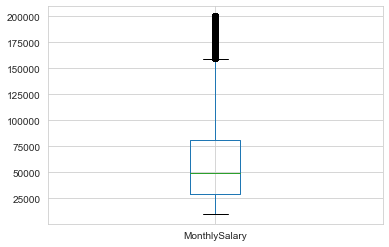

In [126]:
data['MonthlySalary'].plot(kind='box')


In [127]:
data['MonthlySalary'].skew(),np.log(data['MonthlySalary']).skew(),np.cbrt(data['MonthlySalary']).skew()

(1.397656935390218, 0.2906969058846043, 0.6901120767280163)

In [128]:
data['MonthlySalary']=np.log(data['MonthlySalary'])

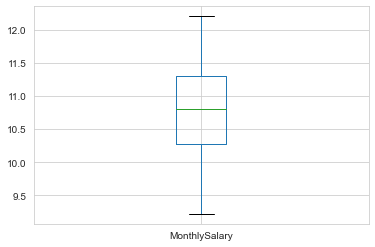

In [129]:
data['MonthlySalary'].plot(kind='box')


# ------------------------------------------------------------------------------------------

In [130]:
data['PercentSalaryIncrement'].value_counts()

13    19322
14    17691
12    16666
15    15264
16    12025
11    10286
17     9638
18     8635
19     7213
20     5481
21     4343
10     4088
22     3739
23     2497
24     1382
25      799
26      337
27       46
Name: PercentSalaryIncrement, dtype: int64

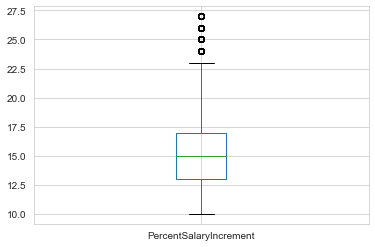

In [131]:
data['PercentSalaryIncrement'].plot(kind='box')


In [132]:
data['PercentSalaryIncrement'].skew(),np.log(data['PercentSalaryIncrement']).skew(),np.cbrt(data['PercentSalaryIncrement']).skew()

(0.7310618347257587, 0.30771366993446053, 0.4473331571480895)

In [133]:
data['PercentSalaryIncrement']=np.log(data['PercentSalaryIncrement'])

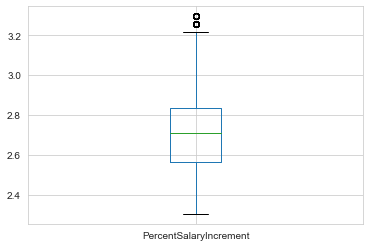

In [134]:
data['PercentSalaryIncrement'].plot(kind='box')

# ------------------------------------------------------------------------------------------

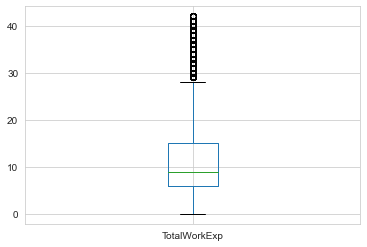

In [135]:
data['TotalWorkExp'].plot(kind='box')

In [136]:
data['TotalWorkExp'].skew(),np.sqrt(data['TotalWorkExp']).skew(),np.cbrt(data['TotalWorkExp']).skew()

(1.1863522689364794, 0.1465600223210278, -0.6489561647882522)

In [137]:
data['TotalWorkExp']=np.sqrt(data['TotalWorkExp'])

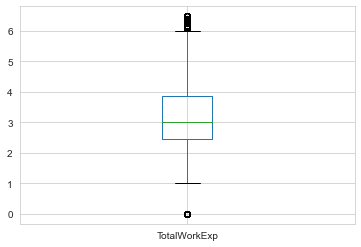

In [138]:
data['TotalWorkExp'].plot(kind='box')

# ------------------------------------------------------------------------------------------

In [139]:
data['YearsWithCurrManager'].value_counts()

0     31323
1     23637
2     19171
3     13321
6     11193
7      9761
4      9167
8      6698
5      5856
9      3610
10     1797
11     1301
12      984
13      565
15      358
14      335
17      186
16      153
18       36
Name: YearsWithCurrManager, dtype: int64

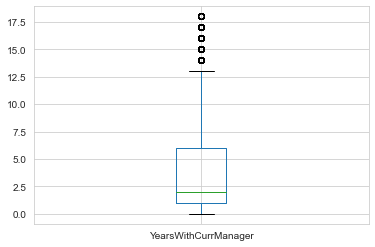

In [140]:
data['YearsWithCurrManager'].plot(kind='box')

In [141]:
data['YearsWithCurrManager'].skew(),np.sqrt(data['YearsWithCurrManager']).skew(),np.cbrt(data['YearsWithCurrManager']).skew()

(1.0646719425141782, -0.03268009795874545, -0.5508313080150533)

In [142]:
data['YearsWithCurrManager']=np.sqrt(data['YearsWithCurrManager'])

# ------------------------------------------------------------------------------------------

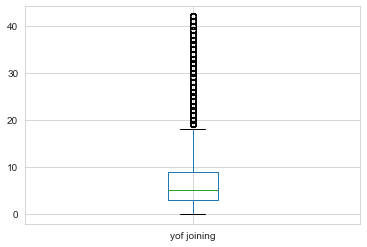

In [143]:
data['yof joining'].plot(kind='box')

In [144]:
data['yof joining'].skew(),np.sqrt(data['yof joining']).skew(),np.cbrt(data['yof joining']).skew()

(2.0092236811150084, 0.3642611727514912, -0.6034002239770709)

In [145]:
data['yof joining']=np.sqrt(data['yof joining'])

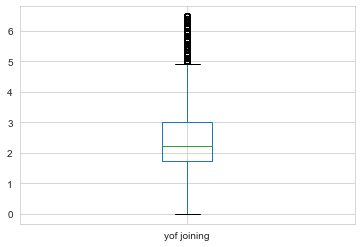

In [146]:
data['yof joining'].plot(kind='box')

# ------------------------------------------------------------------------------------------

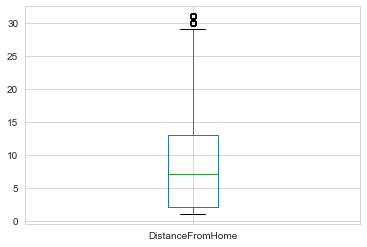

In [147]:
data['DistanceFromHome'].plot(kind='box')

In [148]:
data['DistanceFromHome'].skew(),np.log(data['DistanceFromHome']).skew(),np.cbrt(data['DistanceFromHome']).skew()

(0.9989211990316168, -0.28626230162214356, 0.17107830330611942)

In [149]:
data['DistanceFromHome']=np.cbrt(data['DistanceFromHome'])

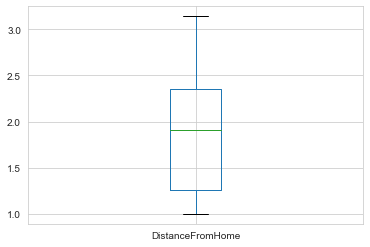

In [150]:
data['DistanceFromHome'].plot(kind='box')

# ------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------

In [151]:
data.columns

Index(['ID', 'Age', 'Recently_upskilled', 'Region', 'RemoteWork',
       'PercentSalaryIncrement', 'OfficeHours', 'StockOptionLevel',
       'College_Tier', 'YearsSinceLastPromotion', 'HighestEducation',
       'BusinessTravel', 'JobLevel', 'MaritalStatus', 'TotalWorkExp',
       'MonthlySalary', 'yof joining', 'YearsWithCurrManager',
       'DistanceFromHome', 'NumCompaniesWorked', 'Gender',
       'TrainingTimesLastYear', 'Department', 'EnvironmentSatisfaction1',
       'EnvironmentSatisfaction2', 'JobSatisfaction1', 'JobSatisfaction2',
       'JobInvolvement1', 'JobInvolvement2', 'PerformanceRating1',
       'PerformanceRating2', 'Age_group'],
      dtype='object')

In [152]:
for i in data[['Recently_upskilled', 'Region', 'RemoteWork','OfficeHours', 'StockOptionLevel',
       'College_Tier', 'YearsSinceLastPromotion', 'HighestEducation',
       'BusinessTravel', 'JobLevel', 'MaritalStatus', 'NumCompaniesWorked', 'Gender',
       'TrainingTimesLastYear', 'Department', 'EnvironmentSatisfaction1',
       'EnvironmentSatisfaction2', 'JobSatisfaction1', 'JobSatisfaction2',
       'JobInvolvement1', 'JobInvolvement2', 'PerformanceRating1',
       'PerformanceRating2','yof joining','YearsWithCurrManager']]:
    print('\n\n-----------------------',i,'--------------------------------')
    print(data[i].value_counts()/data.shape[0]*100)




----------------------- Recently_upskilled --------------------------------
0    79.716318
1    20.283682
Name: Recently_upskilled, dtype: float64


----------------------- Region --------------------------------
Hyderabad    26.210452
Delhi NCR    26.074205
Bangalore    24.974902
Chennai      22.740441
Name: Region, dtype: float64


----------------------- RemoteWork --------------------------------
0    98.408771
1     1.591229
Name: RemoteWork, dtype: float64


----------------------- OfficeHours --------------------------------
7    47.249233
8    41.944182
9    10.806586
Name: OfficeHours, dtype: float64


----------------------- StockOptionLevel --------------------------------
0    48.640392
1    38.126380
2     9.260534
3     3.972693
Name: StockOptionLevel, dtype: float64


----------------------- College_Tier --------------------------------
Tier-3    68.584172
Tier-2    17.570920
Tier-1    13.844907
Name: College_Tier, dtype: float64


----------------------- YearsSinceLas

In [153]:
data.head().T

,0,1,2,3,4
ID,45298,172630,63754,107105,173095
Age,3.207534,3.239612,3.207534,3.361975,3.036589
Recently_upskilled,0,1,1,0,1
Region,Chennai,Delhi NCR,Chennai,Delhi NCR,Hyderabad
RemoteWork,0,0,0,0,0
PercentSalaryIncrement,2.70805,2.772589,2.639057,2.302585,2.772589
OfficeHours,9,7,7,7,7
StockOptionLevel,1,0,0,1,0
College_Tier,Tier-3,Tier-3,Tier-3,Tier-3,Tier-3
YearsSinceLastPromotion,1.0,0.0,1.0,0.0,0.0


# ------------------------------------------------------------------------------------------

In [154]:
 data[['Recently_upskilled', 'Region', 'RemoteWork','OfficeHours', 'StockOptionLevel',
       'College_Tier', 'YearsSinceLastPromotion', 'HighestEducation',
       'BusinessTravel', 'JobLevel', 'MaritalStatus', 'NumCompaniesWorked', 'Gender',
       'TrainingTimesLastYear', 'Department', 'EnvironmentSatisfaction1',
       'EnvironmentSatisfaction2', 'JobSatisfaction1', 'JobSatisfaction2',
       'JobInvolvement1', 'JobInvolvement2', 'PerformanceRating1',
       'PerformanceRating2']]= data[['Recently_upskilled', 
                                                            'Region', 'RemoteWork','OfficeHours', 'StockOptionLevel',
       'College_Tier', 'YearsSinceLastPromotion', 'HighestEducation',
       'BusinessTravel', 'JobLevel', 'MaritalStatus', 'NumCompaniesWorked', 'Gender',
       'TrainingTimesLastYear', 'Department', 'EnvironmentSatisfaction1',
       'EnvironmentSatisfaction2', 'JobSatisfaction1', 'JobSatisfaction2',
       'JobInvolvement1', 'JobInvolvement2', 'PerformanceRating1',
       'PerformanceRating2']].astype('object')

In [155]:
data.drop(['Recently_upskilled', 'Region', 'RemoteWork','OfficeHours', 'StockOptionLevel',
       'College_Tier', 'YearsSinceLastPromotion', 'HighestEducation',
       'BusinessTravel', 'JobLevel', 'MaritalStatus', 'NumCompaniesWorked', 'Gender',
       'TrainingTimesLastYear', 'Department', 'EnvironmentSatisfaction1',
       'EnvironmentSatisfaction2', 'JobSatisfaction1', 'JobSatisfaction2',
       'JobInvolvement1', 'JobInvolvement2', 'PerformanceRating1',
       'PerformanceRating2'],axis=1).columns

Index(['ID', 'Age', 'PercentSalaryIncrement', 'TotalWorkExp', 'MonthlySalary',
       'yof joining', 'YearsWithCurrManager', 'DistanceFromHome', 'Age_group'],
      dtype='object')

In [156]:
cat=data.drop(['ID', 'Age', 'PercentSalaryIncrement', 'TotalWorkExp', 'MonthlySalary', 'yof joining', 'DistanceFromHome'
              ,'YearsWithCurrManager'],axis=1)
cat_d=pd.get_dummies(cat,drop_first=True)

num=data[['Age', 'PercentSalaryIncrement', 'TotalWorkExp', 'MonthlySalary','yof joining', 'DistanceFromHome',
         'YearsWithCurrManager']]
num_sc=pd.DataFrame(ss.fit_transform(num),columns=num.columns)

In [157]:
new=pd.concat([cat_d,num_sc],axis=1)
new['ID']=data['ID']
new.shape,cat.shape,cat_d.shape,num.shape,num_sc.shape

((139452, 94), (139452, 24), (139452, 86), (139452, 7), (139452, 7))

In [158]:
train.shape

(97616, 32)

In [159]:
new_train=new.iloc[:97616]
new_test=new[97616:]

In [160]:
y=train['Employeeturnover']
X=new_train.drop('ID',axis=1)

In [161]:
import imblearn

#Xvalidate, X0, yvalidate, y0 = train_test_split(X, y, test_size=0, stratify=y)

samp=imblearn.over_sampling.RandomOverSampler(sampling_strategy=.3,random_state=100)

X1,y1=samp.fit_resample(X,y)



X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)
X.shape,y.shape,X1.shape,y1.shape

((97616, 93), (97616,), (101788, 93), (101788,))

In [162]:
y.value_counts()

0    78299
1    19317
Name: Employeeturnover, dtype: int64

In [163]:
y1.value_counts()

0    78299
1    23489
Name: Employeeturnover, dtype: int64

# DT

In [465]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

pred_test=DT.predict(X_test)
print(metrics.classification_report(y_test,pred_test))

metrics.confusion_matrix(y_test,pred_test)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     15645
           1       0.76      0.80      0.78      4713

    accuracy                           0.90     20358
   macro avg       0.85      0.86      0.86     20358
weighted avg       0.90      0.90      0.90     20358



array([[14456,  1189],
       [  946,  3767]], dtype=int64)

# RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier

In [466]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)

pred_test=RF.predict(X_test)
print(metrics.classification_report(y_test,pred_test))
metrics.confusion_matrix(y_test,pred_test)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     15645
           1       0.92      0.72      0.80      4713

    accuracy                           0.92     20358
   macro avg       0.92      0.85      0.88     20358
weighted avg       0.92      0.92      0.92     20358



array([[15338,   307],
       [ 1343,  3370]], dtype=int64)

In [164]:
RF2=RandomForestClassifier(n_estimators=100)
RF2.fit(X_train,y_train)

pred_test=RF2.predict(X_test)
print(metrics.classification_report(y_test,pred_test))
metrics.confusion_matrix(y_test,pred_test)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     15698
           1       0.91      0.71      0.80      4660

    accuracy                           0.92     20358
   macro avg       0.92      0.85      0.87     20358
weighted avg       0.92      0.92      0.92     20358



array([[15383,   315],
       [ 1338,  3322]], dtype=int64)

In [73]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# LOGR

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Text(0.5, 1.0, 'Scoring for different class weights')

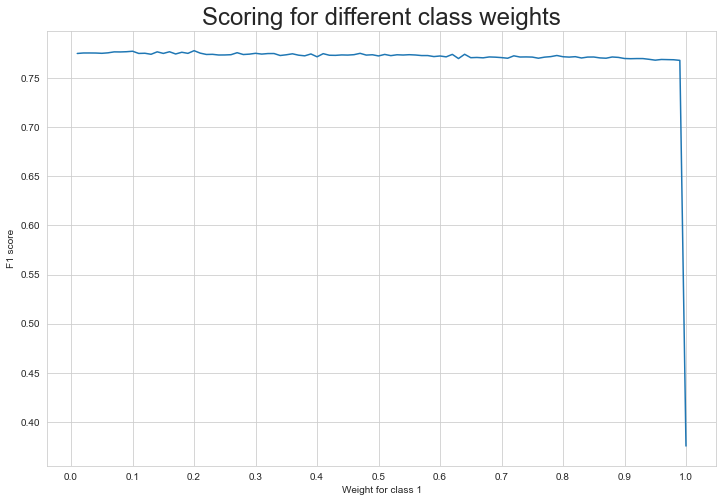

In [52]:
lr = LogisticRegression(solver='newton-cg')
RF=RandomForestClassifier()
#Setting the range for class weights
weights = np.linspace(0.0,0.99,100)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= RF, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits=3), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=3).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

# XGBClassifier?

In [444]:
from xgboost import XGBClassifier

In [490]:
XGB=XGBClassifier(use_label_encoder=False,learning_rate=.15)
XGB.fit(X_train,y_train)

pred_test=XGB.predict(X_test)
print(metrics.classification_report(y_test,pred_test))
metrics.confusion_matrix(y_test,pred_test)

[03:41:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     15645
           1       0.86      0.76      0.81      4713

    accuracy                           0.92     20358
   macro avg       0.90      0.86      0.88     20358
weighted avg       0.92      0.92      0.92     20358



array([[15074,   571],
       [ 1113,  3600]], dtype=int64)

# ADA

In [449]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
pred_test=ada.predict(X_test)
print(metrics.classification_report(y_test,pred_test))
metrics.confusion_matrix(y_test,pred_test)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     15552
           1       0.77      0.55      0.64      4806

    accuracy                           0.86     20358
   macro avg       0.82      0.75      0.78     20358
weighted avg       0.85      0.86      0.85     20358



array([[14767,   785],
       [ 2153,  2653]], dtype=int64)

# Gradient 

In [117]:
GradientBoostingClassifier?

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
Gb=GradientBoostingClassifier(n_estimators=250,learning_rate=.5)
Gb.fit(X_train,y_train)
pred_test=Gb.predict(X_test)
print(metrics.classification_report(y_test,pred_test))
metrics.confusion_matrix(y_test,pred_test)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     18691
           1       0.89      0.91      0.90     11376

    accuracy                           0.92     30067
   macro avg       0.92      0.92      0.92     30067
weighted avg       0.93      0.92      0.92     30067



array([[17403,  1288],
       [  977, 10399]], dtype=int64)

In [119]:
print(metrics.classification_report(y0,Gb.predict(X0)))
metrics.f1_score(y0,Gb.predict(X0))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     15660
           1       0.75      0.88      0.81      3864

    accuracy                           0.92     19524
   macro avg       0.86      0.91      0.88     19524
weighted avg       0.93      0.92      0.92     19524



0.8130372492836677

# KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred_test=knn.predict(X_test)
print(metrics.classification_report(y_test,pred_test))
metrics.confusion_matrix(y_test,pred_test)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     18691
           1       0.74      0.93      0.82     11376

    accuracy                           0.85     30067
   macro avg       0.84      0.87      0.85     30067
weighted avg       0.87      0.85      0.85     30067



array([[14918,  3773],
       [  762, 10614]], dtype=int64)

In [77]:
print(metrics.classification_report(y0,knn.predict(X0)))
metrics.f1_score(y0,knn.predict(X0))

              precision    recall  f1-score   support

           0       0.97      0.80      0.87     15660
           1       0.52      0.89      0.66      3864

    accuracy                           0.82     19524
   macro avg       0.74      0.84      0.77     19524
weighted avg       0.88      0.82      0.83     19524



0.6578619963632882

# ------------------------------------------------------------------------------------------

In [165]:
s_X=new_test.drop('ID',axis=1)

sub=new_test[['ID']].copy(deep=True)
sub['Employeeturnover']=RF2.predict(s_X)

In [167]:
sub.set_index('ID').to_csv('Submissionfile.csv')

In [493]:
sub['Employeeturnover'].value_counts()#XGB

0    33838
1     7998
Name: Employeeturnover, dtype: int64

In [171]:
sub['Employeeturnover'].value_counts()#DT

0    31345
1    10491
Name: Employeeturnover, dtype: int64

In [166]:
sub['Employeeturnover'].value_counts()#RF

0    34168
1     7668
Name: Employeeturnover, dtype: int64

In [64]:
y.value_counts()/y.shape[0]*100

0    80.211236
1    19.788764
Name: Employeeturnover, dtype: float64

In [371]:
7971/(33437+8399)

0.19052968735060713